In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [26]:
# read_csv()
df=pd.read_csv("D:\\New folder\\data\\NSE-TATA.csv")
print(df)

            Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                1534749.0          3486.05  
...

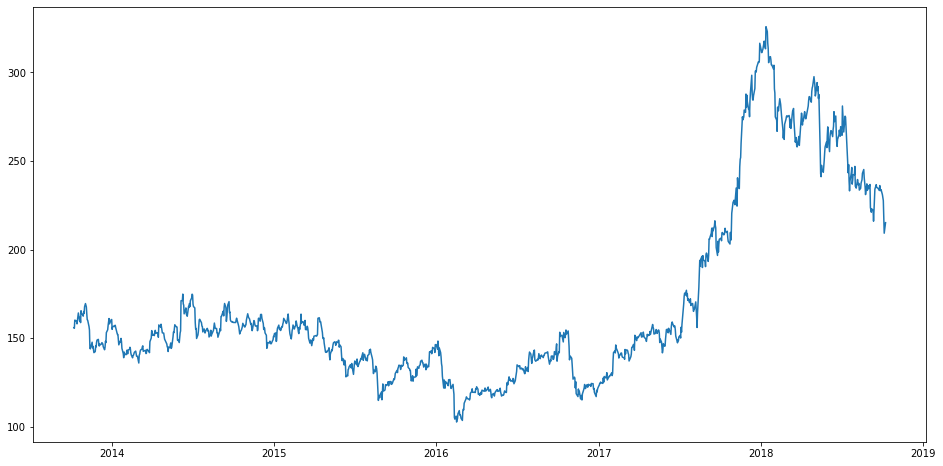

In [27]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [38]:

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
    

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [39]:
#Normalize the new filtered dataset:
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [40]:
#Build and train the LSTM model:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 14s - loss: 9.7494e-04 - 14s/epoch - 15ms/step


In [41]:
#Taking a sample of a dataset to make stock price predictions using the LSTM model
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [42]:
lstm_model.save("saved_model.h5")

C:\Users\admin\AppData\Local\Temp/ipykernel_5068/633063787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


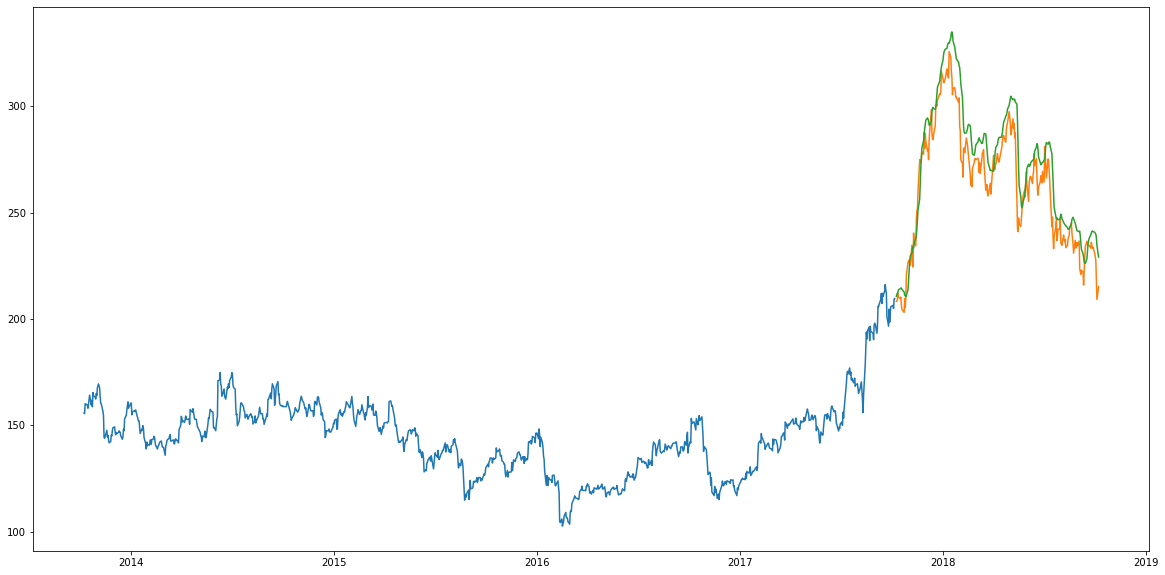

In [43]:
#Visualizing the predicted stock costs with actual stock costs
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [45]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=1bb5ffdf1431ef46d1e3a08419bde6a27a9c38256993982142ed93a331212bbc
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\2b\37\e9\4b5a8c878a47590de4dcf6bdc5a158788a1c17bea578a3ab60
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=bebeda836b3703a290a186aa63287c5f3cb2068dc85c458306e725148a6808a4
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4d\22\3e\d58dc9820aeffc7b7193d04a63b08f585eef4a1ce836d69141
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=460da753e360c35ecf39a2ae4e28a86f587a79445bdd0972387257f0cb2502f5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1f\91\7e\015c42538da07aeb06576caca14da7c7416e9275a51fc85811
Successfully built dash-core-components dash-html-components dash-table
